3.26 graph-DFS-longestCyclePath

In [ ]:
#dfs  后序？？？  recursion
class Solution:
    def longestCycle(self, edges: List[int]) -> int:

        n = len(edges)
        visited = [False]*n
        ranks = [float('inf')] *n

        def dfs(node,rank):
            # visited, alr calculated in cycle, skip
            if visited[node]:
                return -1
            # outdegree=0, not cycle, skip
            if edges[node] == -1:
                return -1
            
            #If the rank of a node is less than the current rank, 
            #it means that the node is part of a cycle 
            #calculate the length of the cycle by 
            #subtracting the ranks of the nodes at the beginning and end of the cycle.
            if ranks[node] < rank:
                return rank-ranks[node]
            #if not (rank[node] = 'inf')
            else:
                ranks[node] = rank
                cyc_len = dfs(edges[node],rank+1)
                #visited status is changed after calclulation
                visited[node] = True
                return cyc_len


        longest_cycle = -1
        for node in range(n):
            cycle_length = dfs(node,0)
            if cycle_length >0:
                longest_cycle = max(longest_cycle,cycle_length)
        return longest_cycle

In [ ]:
### dfs  先序  iteration
class Solution_iteration:
  def longestCycle(self, edges: List[int]) -> int:
    ans = -1  # Initialize the answer to -1
    time = 1  # Initialize the current time step to 1
    timeVisited = [0] * len(edges)  # Initialize a list to store the time at which each node was first visited

    # Iterate through each node in the graph
    for i, edge in enumerate(edges):
      if timeVisited[i]:  # If the node has already been visited, skip it
        continue
      else:
        startTime = time  # Record the start time of the current traversal
        u = i  # Initialize the current node to the ith node
        # Traverse the graph until the end of the path is reached or a visited node is encountered
        while u != -1 and not timeVisited[u]:
          timeVisited[u] = time  # Record the current time step
          time += 1  # Increment time
          u = edges[u]  # Move to the next node in the path
        # If a cycle is found that includes the current node, update the answer
        if u != -1 and timeVisited[u] >= startTime:
          ans = max(ans, time - timeVisited[u])

    return ans  # Return the length of the longest cycle found

You are given a directed graph of n nodes numbered from 0 to n - 1, where each node has at most one outgoing edge.

The graph is represented with a given 0-indexed array edges of size n, indicating that there is a directed edge from node i to node edges[i]. If there is no outgoing edge from node i, then edges[i] == -1.

Return the length of the longest cycle in the graph. If no cycle exists, return -1.

A cycle is a path that starts and ends at the same node.

 

Example 1:
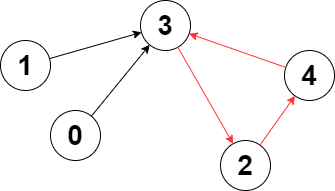 </br>

Input: edges = [3,3,4,2,3]
Output: 3
Explanation: The longest cycle in the graph is the cycle: 2 -> 4 -> 3 -> 2.
The length of this cycle is 3, so 3 is returned.


Example 2:
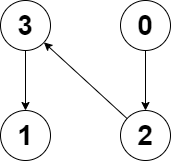 </br>

Input: edges = [2,-1,3,1]
Output: -1
Explanation: There are no cycles in this graph.
 

Constraints:

n == edges.length
2 <= n <= 105
-1 <= edges[i] < n
edges[i] != i